In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('diabetes_na.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1
1,NaN,85,66,29.0,0,26.6,0.351,NaN,0
2,8.0,183,64,0.0,0,NaN,0.672,32.0,1
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
4,0.0,137,40,35.0,168,43.1,2.288,33.0,1


# Handling Missing values

In [3]:
data.isna().sum()

Pregnancies                 2
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     0
BMI                         1
DiabetesPedigreeFunction    0
Age                         1
Outcome                     0
dtype: int64

In [4]:
data=data.fillna(method='bfill')
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Split the data for Training & Testing

In [5]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (576, 8)

Training data-y- Shape:	 (576, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (192, 8)

Testing data(y-Outcome) Shape:	 (192, 1)


# Model Development with Logistic RegressionAlgorithm

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#invoke the log reg algorithm from sklearn
log_reg=LogisticRegression(solver='liblinear',verbose=2)
#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('********************Performance Measures for Logistic Regression Classfication****')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)

Training the model

[LibLinear]Predicted Label for the input samples:
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0]

Testing is completed

Testing samples are: 	 192
********************Performance Measures for Logistic Regression Classfication****
Accuracy Score:	
 0.7604166666666666

Confusion Matrix:
 [[121  13]
 [ 33  25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       134
           1       0.66      0.43      0.52        58

    accuracy                           0.76       192
   macro avg       0.72      0.67      0.68       192
weighted avg       0.75     

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

# 1. Feature Engineering Techniques - Scaling
 1. Do we need to scale the data?
 2. If yes, which scaling method - need to adapt

In [9]:
x.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148,72,35.0,0,33.6,0.627,50.0
1,8.0,85,66,29.0,0,26.6,0.351,32.0
2,8.0,183,64,0.0,0,28.1,0.672,32.0
3,1.0,89,66,23.0,94,28.1,0.167,21.0
4,0.0,137,40,35.0,168,43.1,2.288,33.0


In [10]:
from sklearn.preprocessing import StandardScaler
std_sc=StandardScaler()
sc_x=std_sc.fit_transform(x)

In [11]:
sc_x

array([[ 0.63286155,  0.84832379,  0.14964075, ...,  0.20334846,
         0.46849198,  1.42590802],
       [ 1.22522922, -1.12339636, -0.16054575, ..., -0.68564992,
        -0.36506078, -0.10569668],
       [ 1.22522922,  1.94372388, -0.26394125, ..., -0.49515027,
         0.60439732, -0.10569668],
       ...,
       [ 0.33667772,  0.00330087,  0.14964075, ..., -0.73644983,
        -0.68519336, -0.27587498],
       [-0.84805762,  0.1597866 , -0.47073225, ..., -0.24115073,
        -0.37110101,  1.17064057],
       [-0.84805762, -0.8730192 ,  0.04624525, ..., -0.2030508 ,
        -0.47378505, -0.87149903]])

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(sc_x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (576, 8)

Training data-y- Shape:	 (576, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (192, 8)

Testing data(y-Outcome) Shape:	 (192, 1)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
 #invoke the log reg algorithm from sklearn
log_reg=LogisticRegression(solver='liblinear',verbose=2)
 #Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('********************Performance Measures for Logistic Regression Cla**')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)

Training the model

[LibLinear]Predicted Label for the input samples:
 [0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0]

Testing is completed

Testing samples are: 	 192
********************Performance Measures for Logistic Regression Cla**
Accuracy Score:	
 0.7604166666666666

Confusion Matrix:
 [[120  14]
 [ 32  26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       134
           1       0.65      0.45      0.53        58

    accuracy                           0.76       192
   macro avg       0.72      0.67      0.68       192
weighted avg       0.75      0.76      0

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from sklearn.preprocessing import MinMaxScaler
mm_sc=MinMaxScaler()
mm_x=mm_sc.fit_transform(x)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(mm_x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (576, 8)

Training data-y- Shape:	 (576, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (192, 8)

Testing data(y-Outcome) Shape:	 (192, 1)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#invoke the log reg algorithm from sklearn
log_reg=LogisticRegression(solver='liblinear',verbose=2)
#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('********************Performance Measures for Logistic Regression Cla*')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)

Training the model

[LibLinear]Predicted Label for the input samples:
 [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0]

Testing is completed

Testing samples are: 	 192
********************Performance Measures for Logistic Regression Cla*
Accuracy Score:	
 0.7552083333333334

Confusion Matrix:
 [[123  11]
 [ 36  22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       134
           1       0.67      0.38      0.48        58

    accuracy                           0.76       192
   macro avg       0.72      0.65      0.66       192
weighted avg       0.74      0.76      0.

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Feature Engineering Techniques - Handling the imbalance data

<Axes: ylabel='count'>

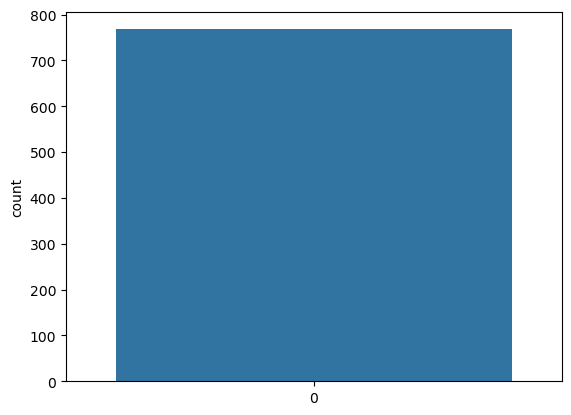

In [16]:
 sns.countplot(data['Outcome'])

# UPsample

Majority lenght:	 500

Minority Length:	 268
(1000, 9)

Axes(0.125,0.11;0.775x0.77)


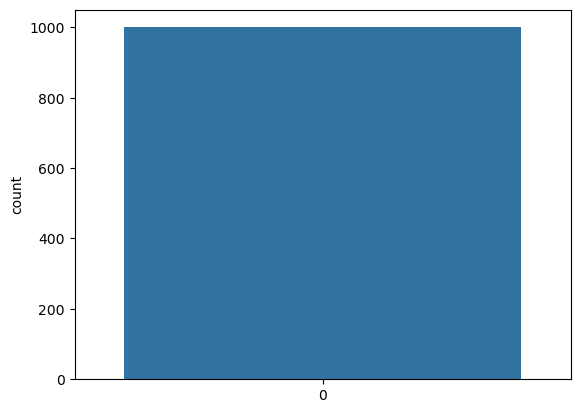

In [17]:
from sklearn.utils import resample
df_majority=data[data.Outcome==0]
df_minority=data[data.Outcome==1]
print('Majority lenght:\t',len(df_majority))
print()
print('Minority Length:\t',len(df_minority))
print('='*100)
#Upsample
df_minority_upsampled=resample(df_minority,replace=True,n_samples=500,random_state=12)
df_upsampled=pd.concat([df_majority,df_minority_upsampled])
print(df_upsampled.shape)
print()
print(sns.countplot(df_upsampled['Outcome']))

In [18]:
df_upsampled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,8.0,85,66,29.0,0,26.6,0.351,32.0,0
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
5,5.0,116,74,0.0,0,25.6,0.201,30.0,0
7,10.0,115,0,0.0,0,35.3,0.134,29.0,0
10,4.0,110,92,0.0,0,37.6,0.191,30.0,0


In [19]:
df_upsampled.shape

(1000, 9)

In [20]:
x=df_upsampled.iloc[:,:-1]
y=df_upsampled.iloc[:,-1:]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (750, 8)

Training data-y- Shape:	 (750, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (250, 8)

Testing data(y-Outcome) Shape:	 (250, 1)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#invoke the log reg algorithm from sklearn
log_reg=LogisticRegression(solver='liblinear',verbose=2)
#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('********************Performance Measures for Logistic Regression Classification***************')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print() 
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)

Training the model

[LibLinear]Predicted Label for the input samples:
 [1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0
 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1
 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0
 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0]

Testing is completed

Testing samples are: 	 250
********************Performance Measures for Logistic Regression Classification***************
Accuracy Score:	
 0.736

Confusion Matrix:
 [[87 34]
 [32 97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72       121
           1       0.74      0.75      0.75       129

    accuracy            

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Downsample

Majority lenght:	 500

Minority Length:	 268
(536, 9)

Axes(0.125,0.11;0.775x0.77)


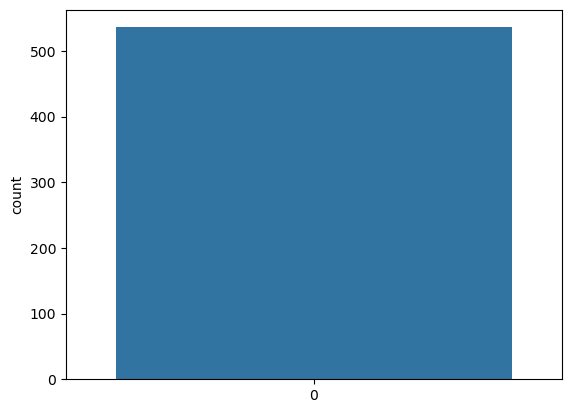

In [22]:
from sklearn.utils import resample
df_majority=data[data.Outcome==0]
df_minority=data[data.Outcome==1]
print('Majority lenght:\t',len(df_majority))
print()
print('Minority Length:\t',len(df_minority))
print('='*100)
#Upsample
df_majority_downsampled=resample(df_majority,replace=False,n_samples=268,random_state=12)
df_downsampled=pd.concat([df_majority_downsampled,df_minority])
print(df_downsampled.shape)
print()
print(sns.countplot(df_downsampled['Outcome']))

In [23]:
x=df_downsampled.iloc[:,:-1]
y=df_downsampled.iloc[:,-1:]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (402, 8)

Training data-y- Shape:	 (402, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (134, 8)

Testing data(y-Outcome) Shape:	 (134, 1)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#invoke the log reg algorithm from sklearn
log_reg=LogisticRegression()
#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('********************Performance Measures for Logistic Regression Classification**************************')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)

Training the model

Predicted Label for the input samples:
 [0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1
 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1]

Testing is completed

Testing samples are: 	 134
********************Performance Measures for Logistic Regression Classification**************************
Accuracy Score:	
 0.7761194029850746

Confusion Matrix:
 [[53 18]
 [12 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        71
           1       0.74      0.81      0.77        63

    accuracy                           0.78       134
   macro avg       0.78      0.78      0.78       134
weighted avg       0.78      0.78      0.78       134



C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
